<a href="https://colab.research.google.com/github/lucbijl/sociophysics/blob/main/Sociophysics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as scp

In [ ]:
data_1min=pd.read_csv('https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=LLY&interval=1min&extended_hours=false&month=2022-11&outputsize=full&apikey=C79R41DNPBWVJ8DV&datatype=csv')
data_daily=pd.read_csv('https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&outputsize=full&symbol=LLY&apikey=C79R41DNPBWVJ8DV&datatype=csv')

In [ ]:
data_1min['timestamp']=pd.to_datetime(data_1min['timestamp'])
data_1min['return']=np.log(data['close']/data['open'])
data_daily['timestamp']=pd.to_datetime(data_daily['timestamp'])


In [ ]:
index=(data_daily['timestamp']<pd.to_datetime('2022-12-01'))&(data_daily['timestamp']>pd.to_datetime('2022-11-01'))
data_daily=data_daily.loc[index]

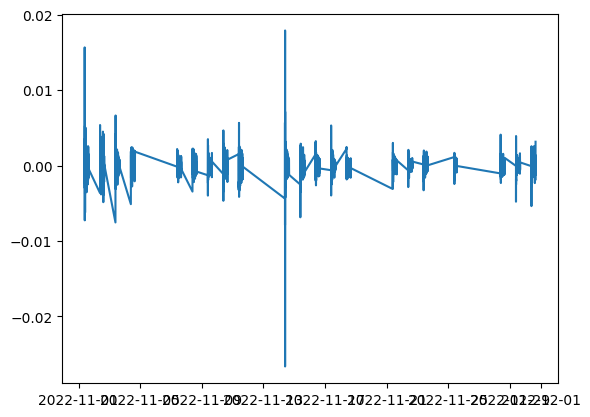

In [117]:
plt.plot(data_1min['timestamp'],data_1min['return']);


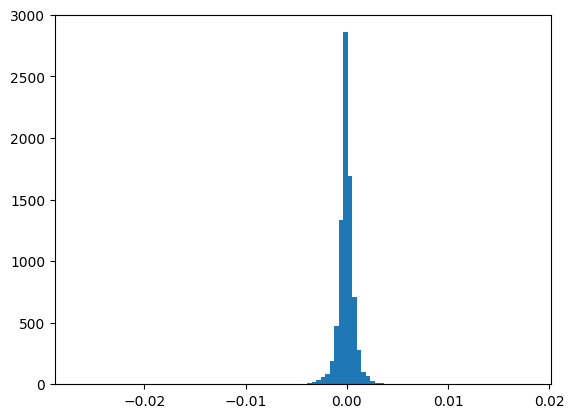

In [116]:
plt.hist(data_1min['return'],bins=100);

In [ ]:
data_1min.to_excel('/content/drive/MyDrive/Sociophysics/data_LLY_1min.xlsx')
data_daily.to_excel('/content/drive/MyDrive/Sociophysics/data_LLY_daily.xlsx')